In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import random
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

learning_rate = 0.001
epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None,784])
Y = tf.placeholder(tf.float32, [None, 10])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
W1 = tf.get_variable("W1", shape=[784,512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512,10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

--- 학습 시작 ---
Epoch : 0, Cost : 0.29155
Epoch : 1, Cost : 0.10416
Epoch : 2, Cost : 0.06912
Epoch : 3, Cost : 0.05116
Epoch : 4, Cost : 0.04127
Epoch : 5, Cost : 0.03539
Epoch : 6, Cost : 0.02888
Epoch : 7, Cost : 0.02479
Epoch : 8, Cost : 0.02208
Epoch : 9, Cost : 0.02330
Epoch : 10, Cost : 0.01766
Epoch : 11, Cost : 0.01705
Epoch : 12, Cost : 0.01767
Epoch : 13, Cost : 0.01439
Epoch : 14, Cost : 0.01581
--- 학습 종료 ---
Accuracy: 0.9745
실제 정답 :  [3]
예측 결과 :  [3]


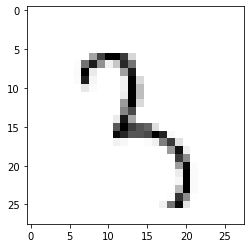

In [3]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    print('--- 학습 시작 ---')
    for i in range(epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)

        for j in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c/total_batch

        print('Epoch : {}, Cost : {:.5f}'.format(i, avg_cost))
    print('--- 학습 종료 ---')

    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy:', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

    r = random.randint(0, mnist.test.num_examples-1)
    print('실제 정답 : ', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("예측 결과 : ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()